# COVID ANALYSIS AND PREDICTION :
                                                            
Corona Virus disease (COVID-19) is an infectious disease caused by a newly discovered virus, which emerged in Wuhan, China in December of 2019.Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so you might have heard caution to practice respiratory etiquette (for example, by coughing into a flexed elbow).
# Libraries

We import a few important libraries that we shall use in the model. Pandas is an extremely fast and flexible data analysis and allows you to allow you to store and manipulate tabular data. We also import visualisation libraries such as matplotlib, seaborn and plotly.

# Prediction



For the prediction purpose we have use Prophet library produced by Facebook which is used for Time series Forecasting. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

Prophet is available in both Python and R but in this project we have use python. Prophet() function is used do define a Prophet forecasting model in Python.  Input to Prophet is a dataframe with minimum two columns : ds and y.  ds is datestamp column and should be as per pandas datatime format, YYYY-MM-DD or YYYY-MM-DD HH:MM:SS for a timestamp and y is the numeric column we want to predict or forecast. We can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history.

Prophet time series = Trend + Seasonality + Holiday + error. 
 Trend models non periodic changes in the value of the time series.
 Seasonality is the periodic changes like daily, weekly, or yearly seasonality.
Holiday effect which occur on irregular schedules over a day or a period of days.
Error terms is what is not explained by the model.



T

# IMPORTING VARIOUS LIBRARIES FOR COVID PREDCITION AND ANALYSIS

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import datetime

# Predictions
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
print("Modules are Imported ")


Modules are Imported 


# LOADING THE DATA

In [2]:
age_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
icmrTestLabs = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv') #Test labs data
covid_data = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
world_data = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
hospital_data = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')

# DATA OF INDIA (COVID)

In [3]:
covid_data.head() 

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_data.tail(5) #Recent Cases 

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3706,3707,03/07/20,8:00 AM,Tripura,-,-,1146,1,1435
3707,3708,03/07/20,8:00 AM,Uttarakhand,-,-,2405,42,2984
3708,3709,03/07/20,8:00 AM,Uttar Pradesh,-,-,17221,735,24825
3709,3710,03/07/20,8:00 AM,West Bengal,-,-,13037,699,19819
3710,3711,03/07/20,8:00 AM,Cases being reassigned to states,-,-,0,0,6031


In [5]:
 covid_data.isnull().sum() #checking for null values


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
state_cases = covid_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#Creating new columns 'Active', 'Death rate per 100' and 'Cure rate per 100'
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Cured'] + state_cases['Deaths'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [7]:
#Sort by maximum Confirmed Cases
state_cases = state_cases.sort_values(by='Confirmed', ascending=False) 
state_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues', subset=["Active"])\
                        

,State/UnionTerritory,Confirmed,Deaths,Cured,Active
22,Maharashtra,186626,8178,101172,77276
32,Tamil Nadu,98392,1321,56021,41050
11,Delhi,92175,2864,63007,26304
13,Gujarat,33913,1886,24593,7434
37,Uttar Pradesh,24825,735,17221,6869
39,West Bengal,19819,699,13037,6083
30,Rajasthan,18662,430,14948,3284
33,Telangana,18570,275,9069,9226
18,Karnataka,18016,272,8334,9410
1,Andhra Pradesh,16097,198,7313,8586


In [8]:
#plot for Total Deaths in India (State wise Anlaysis)
import datetime 
today = datetime.date.today() # today date
yesterday = today - datetime.timedelta(days=1) #timedelta used duration i.e difference between two dates / times
yesterday=yesterday.strftime('%d/%m/%y') # By using strftime we can format the time in different desirable ways
df1= covid_data[covid_data['Date']==yesterday] # Below the plot I have shown the dataframe
fig = px.bar(df1, x='State/UnionTerritory', y='Deaths', height=600)
fig.update_layout(
    title='Till {} Total Deaths in India'.format(yesterday))
fig.show()
df1.head()



,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3675,3676,03/07/20,8:00 AM,Andaman and Nicobar Islands,-,-,51,0,109
3676,3677,03/07/20,8:00 AM,Andhra Pradesh,-,-,7313,198,16097
3677,3678,03/07/20,8:00 AM,Arunachal Pradesh,-,-,66,1,195
3678,3679,03/07/20,8:00 AM,Assam,-,-,6106,12,9013
3679,3680,03/07/20,8:00 AM,Bihar,-,-,8020,77,10471


In [9]:
# Plot for Recovered Cases in India (State Wise Analysis)

import datetime 
today = datetime.date.today() # today date
yesterday = today - datetime.timedelta(days=1) #timedelta used duration i.e difference between two dates / times
yesterday=yesterday.strftime('%d/%m/%y')
df1= covid_data[covid_data['Date']==yesterday] # Selecting the yesterday date 
fig = px.bar(df1, x='State/UnionTerritory', y='Cured', height=600)
fig.update_layout(
    title='Till {} Total Recovered Cases in India'.format(yesterday))
fig.show() # plot 
df1.head() # Dataframe df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3675,3676,03/07/20,8:00 AM,Andaman and Nicobar Islands,-,-,51,0,109
3676,3677,03/07/20,8:00 AM,Andhra Pradesh,-,-,7313,198,16097
3677,3678,03/07/20,8:00 AM,Arunachal Pradesh,-,-,66,1,195
3678,3679,03/07/20,8:00 AM,Assam,-,-,6106,12,9013
3679,3680,03/07/20,8:00 AM,Bihar,-,-,8020,77,10471


# AGE DATA

In [10]:
age_data.head(15) # It shows which age group is more affected by Covid 

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [11]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [12]:
percent = age_data['Percentage'] #percentage of people affected
percent


0     3.18%
1     3.90%
2    24.86%
3    21.10%
4    16.18%
5    11.13%
6    12.86%
7     4.05%
8     1.45%
9     1.30%
Name: Percentage, dtype: object

Text(0, 0.5, 'Total Nuumber of  Cases')

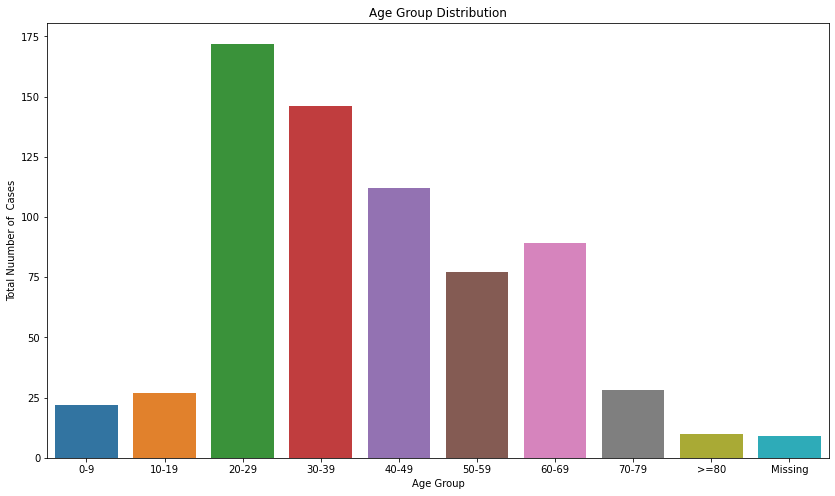

In [13]:
# Plot 
plt.figure(figsize=(14,8)) #This Shows age group between 20 -29 is most affected by Covid
sns.barplot(data= age_data,x='AgeGroup',y='TotalCases')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Nuumber of  Cases')


# ICMR TEST LAB DATA


In [14]:
icmrTestLabs.head() #This will show everything bout Labs i.e Name , Address , State , pincode etc.

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [15]:
icmrTestLabs['state'].value_counts() #Just to Show which state has more Labs



Maharashtra                                 39
Tamil Nadu                                  26
Telangana                                   19
Delhi                                       18
Karnataka                                   17
Uttar Pradesh                               17
Gujarat                                     14
West Bengal                                 13
Kerala                                      12
Haryana                                     11
Madhya Pradesh                              10
Rajasthan                                    9
Andhra Pradesh                               7
Odisha                                       7
Assam                                        6
Bihar                                        6
Punjab                                       5
Jammu and Kashmir                            4
Uttarakhand                                  3
Chhattisgarh                                 3
Himachal Pradesh                             3
Chandigarh   

In [16]:
icmrTestLabs['type'].unique() # Just to check which type of labs i.e Private , Government or Collection Site

array(['Government Laboratory', 'Collection Site', 'Private Laboratory'],
      dtype=object)

In [17]:
Labs_type_by_State = icmrTestLabs[['type', 'state']].groupby(['type', 'state']).sum()
display(Labs_type_by_State)

Empty DataFrame
Columns: []
Index: [(Collection Site, Arunachal Pradesh), (Collection Site, Ladakh), (Collection Site, Sikkim), (Government Laboratory, Andaman and Nicobar Islands), (Government Laboratory, Andhra Pradesh), (Government Laboratory, Assam), (Government Laboratory, Bihar), (Government Laboratory, Chandigarh), (Government Laboratory, Chhattisgarh), (Government Laboratory, Dadra and Nagar Haveli and Daman and Diu), (Government Laboratory, Delhi), (Government Laboratory, Goa), (Government Laboratory, Gujarat), (Government Laboratory, Haryana), (Government Laboratory, Himachal Pradesh), (Government Laboratory, Jammu and Kashmir), (Government Laboratory, Jharkhand), (Government Laboratory, Karnataka), (Government Laboratory, Kerala), (Government Laboratory, Madhya Pradesh), (Government Laboratory, Maharashtra), (Government Laboratory, Manipur), (Government Laboratory, Meghalaya), (Government Laboratory, Mizoram), (Government Laboratory, Odisha), (Government Laboratory, Puducherry), (Government Laboratory, Punjab), (Government Laboratory, Rajasthan), (Government Laboratory, Tamil Nadu), (Government Laboratory, Telangana), (Government Laboratory, Tripura), (Government Laboratory, Uttar Pradesh), (Government Laboratory, Uttarakhand), (Government Laboratory, West Bengal), (Private Laboratory, Delhi), (Private Laboratory, Gujarat), (Private Laboratory, Haryana), (Private Laboratory, Karnataka), (Private Laboratory, Kerala), (Private Laboratory, Madhya Pradesh), (Private Laboratory, Maharashtra), (Private Laboratory, Odisha), (Private Laboratory, Punjab), (Private Laboratory, Rajasthan), (Private Laboratory, Tamil Nadu), (Private Laboratory, Telangana), (Private Laboratory, Uttar Pradesh), (Private Laboratory, Uttarakhand), (Private Laboratory, West Bengal)]

Statewise Analysis of Test Labs

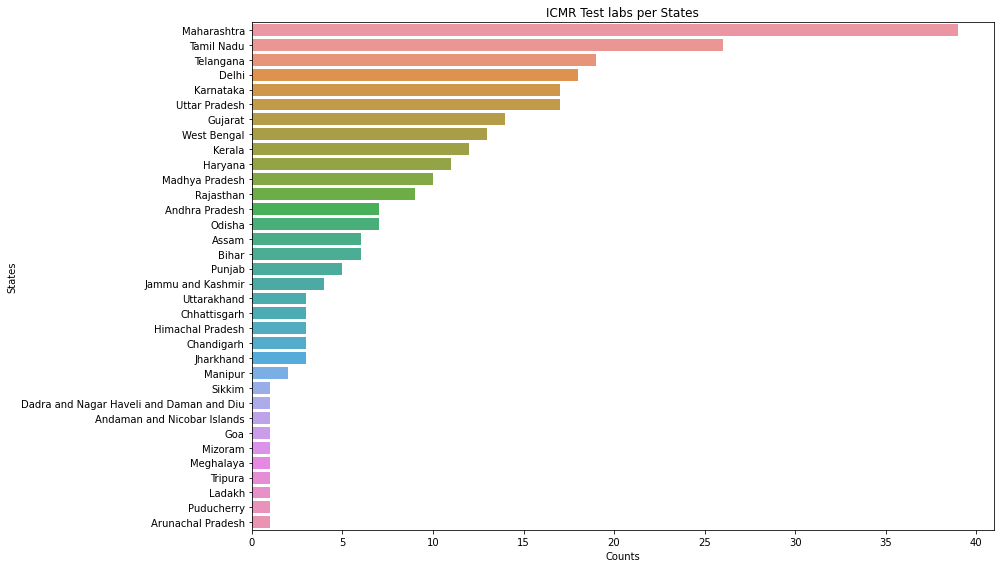

In [18]:
state=list(icmrTestLabs['state'].value_counts().index) #states
count=list(icmrTestLabs['state'].value_counts()) #number of labs
plt.figure(figsize=(14,8))
sns.barplot(x=count,y=state)
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('ICMR Test labs per States')
plt.tight_layout()

# HOSPITAL DATA

In [19]:
hospital_data.head(10)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [20]:
hospital_data.describe()# Mean , total , percentile etc on all columns

,Sno,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
count,37.000000,37.000000,30.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,300.972973,83.666667,54.216216,2039.189189,39947.243243,1070.810811,15112.864865,203.891892,23306.648649
std,10.824355,907.160512,229.572817,163.173584,6130.345694,120196.898697,3278.430865,45752.664986,616.352568,70502.578529
min,1.000000,2.000000,1.000000,1.000000,8.000000,250.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,17.000000,6.000000,9.000000,114.000000,2666.000000,24.000000,630.000000,14.000000,1393.000000
50%,19.000000,82.000000,25.500000,23.000000,683.000000,13527.000000,273.000000,5805.000000,59.000000,5228.000000
75%,28.000000,229.000000,63.250000,37.000000,1867.000000,39511.000000,705.000000,10944.000000,149.000000,18819.000000
max,37.000000,5568.000000,1255.000000,1003.000000,37725.000000,739024.000000,19810.000000,279588.000000,3772.000000,431173.000000


In [21]:
hospital_data.isnull().sum() #checking Null values 
#  our data has only one column which is missing values i.e  NumSubDistrictHospitals_HMIS 


Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [22]:
hospital_data['NumSubDistrictHospitals_HMIS'] = hospital_data['NumSubDistrictHospitals_HMIS'].fillna(0)
#fill all the missing values with zero (0)

In [23]:
# Public Beds in Hospital  
fig = px.bar(hospital_data,                                  
             x=hospital_data['State/UT'].iloc[:36], 
             y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
             color=hospital_data['NumPublicBeds_HMIS'].iloc[:36])

fig.update_layout(title={
        'text': "Num of Public Beds in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State/UT",
        yaxis_title="Number of Public Beds",
        plot_bgcolor='white')

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>5. World Data</h1>
</div>

In [24]:
world_data.head() #World Data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [25]:
world_data['Date'] = world_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [26]:
world_data['Date'] = world_data['Date'].dt.strftime('%Y/%m/%d') 

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>6. Making Predictions (India)</h1>
</div>

 Data forecasting is done by using Prophet library .Prophet is an open source library published by Facebook which is good for Time Series Forecasting. We will predict the coronavirus cases till ** Mid August  2020**.

In [27]:
india_data = world_data[world_data["Country/Region"]=="India"] #Selecting India from World Data
india_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,21.0,78.0,2020/01/22,0,0,0,0,South-East Asia
390,NaN,India,21.0,78.0,2020/01/23,0,0,0,0,South-East Asia
651,NaN,India,21.0,78.0,2020/01/24,0,0,0,0,South-East Asia
912,NaN,India,21.0,78.0,2020/01/25,0,0,0,0,South-East Asia
1173,NaN,India,21.0,78.0,2020/01/26,0,0,0,0,South-East Asia


In [28]:
pred_data = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
pred_data['Date'] = pred_data['Date'].apply(pd.to_datetime, dayfirst=True)
#Grouping the data Based upon Date and Cnfirmed , Recovered Casea and Deaths

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.1. Confirmed Cases in India</h1>
</div>

In [29]:
pred_confirm = pred_data.loc[:, ['Date', 'Confirmed']] # for Prophet model we are required to have atleast 2 columns
# Date and Object which we are  Predicting
pred_confirm.tail()

,Date,Confirmed
158,2020-06-28,548318
159,2020-06-29,566840
160,2020-06-30,585481
161,2020-07-01,604641
162,2020-07-02,625544


<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.1. Creating Model</h1>
</div>

Defining our Prophet() model.

In [30]:
model = Prophet()

In [31]:
# Dataframe must have columns "ds" and "y" with the dates and values  for prophet prediction
pred_confirm.columns = ['ds', 'y']
model.fit(pred_confirm)

In [48]:
future = model.make_future_dataframe(periods=45) # helper function to extend the dataframe for specified days
future.tail()

,ds
203,2020-08-12
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16


<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.2. Making Predictions</h1>
</div>

In [33]:
# yhat represents the prediction, while yhat_lower and yhat_upper represent the lower and upper bound
forecast_india_conf = model.predict(future)
forecast_india_conf

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.167726e+02,-1.125384e+04,1.141630e+04,-5.167726e+02,-5.167726e+02,379.347470,379.347470,379.347470,379.347470,379.347470,379.347470,0.0,0.0,0.0,-1.374251e+02
1,2020-01-23,-5.011730e+02,-1.117161e+04,1.190424e+04,-5.011730e+02,-5.011730e+02,852.904505,852.904505,852.904505,852.904505,852.904505,852.904505,0.0,0.0,0.0,3.517315e+02
2,2020-01-24,-4.855735e+02,-1.314514e+04,9.305961e+03,-4.855735e+02,-4.855735e+02,-821.950008,-821.950008,-821.950008,-821.950008,-821.950008,-821.950008,0.0,0.0,0.0,-1.307523e+03
3,2020-01-25,-4.699739e+02,-1.252485e+04,1.034220e+04,-4.699739e+02,-4.699739e+02,-321.584955,-321.584955,-321.584955,-321.584955,-321.584955,-321.584955,0.0,0.0,0.0,-7.915589e+02
4,2020-01-26,-4.543744e+02,-1.250840e+04,1.133955e+04,-4.543744e+02,-4.543744e+02,-52.101622,-52.101622,-52.101622,-52.101622,-52.101622,-52.101622,0.0,0.0,0.0,-5.064760e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,1.098608e+06,1.048895e+06,1.149322e+06,1.048108e+06,1.147047e+06,379.347470,379.347470,379.347470,379.347470,379.347470,379.347470,0.0,0.0,0.0,1.098988e+06
204,2020-08-13,1.111256e+06,1.058459e+06,1.161372e+06,1.058658e+06,1.161923e+06,852.904505,852.904505,852.904505,852.904505,852.904505,852.904505,0.0,0.0,0.0,1.112109e+06
205,2020-08-14,1.123903e+06,1.066919e+06,1.178518e+06,1.069170e+06,1.176078e+06,-821.950008,-821.950008,-821.950008,-821.950008,-821.950008,-821.950008,0.0,0.0,0.0,1.123081e+06
206,2020-08-15,1.136551e+06,1.080411e+06,1.190096e+06,1.080237e+06,1.190195e+06,-321.584955,-321.584955,-321.584955,-321.584955,-321.584955,-321.584955,0.0,0.0,0.0,1.136229e+06


In [34]:
fig = plot_plotly(model, forecast_india_conf) 

fig.update_layout(template='plotly_white')

iplot(fig) 

We can clearly see the prediction of our model that on **'16 August, 2020'** there will be a total of **'~1.2M (12 lakh)'** confirmed cases in India if the number of confirmed cases goes on increasing like this.

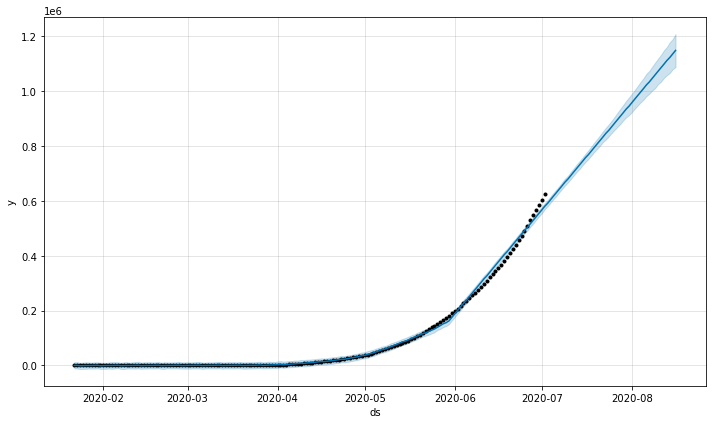

In [35]:
fig = model.plot(forecast_india_conf)

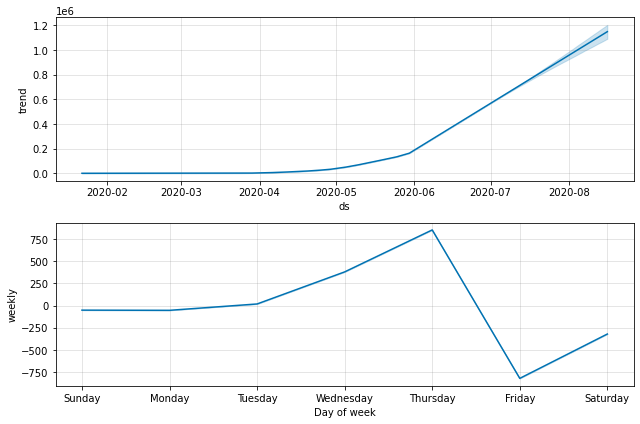

In [36]:
# Plot the various component i.e how the trend goes 
fig = model.plot_components(forecast_india_conf)

In [37]:
cnfrm = forecast_india_conf.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0] # trend goes like present trend
cnfrm.columns = ['Date','Confirm'] # name the columns
cnfrm.tail(15)

,Date,Confirm
193,2020-08-02,9.721331e+05
194,2020-08-03,9.847806e+05
195,2020-08-04,9.974281e+05
196,2020-08-05,1.010076e+06
197,2020-08-06,1.022723e+06
198,2020-08-07,1.035371e+06
199,2020-08-08,1.048018e+06
200,2020-08-09,1.060666e+06
201,2020-08-10,1.073313e+06
202,2020-08-11,1.085961e+06


# Recovered Cases


Just like we predict the no. of confirmed Cases we are gonna predict Recovered and Death Cases

In [38]:
pred_recovered_cases = pred_data.loc[:, ['Date', 'Recovered']]

pred_recovered_cases.head(10)


,Date,Recovered
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
5,2020-01-27,0
6,2020-01-28,0
7,2020-01-29,0
8,2020-01-30,0
9,2020-01-31,0


In [39]:
model = Prophet()

pred_recovered_cases.columns = ['ds', 'y']
model.fit(pred_recovered_cases)

In [40]:
future = model.make_future_dataframe(periods=45)
future.tail()

,ds
203,2020-08-12
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16


In [41]:
forecast_india_recover = model.predict(future)

forecast_india_recover

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-444.009457,-10647.315384,9519.115838,-444.009457,-444.009457,-39.422218,-39.422218,-39.422218,-39.422218,-39.422218,-39.422218,0.0,0.0,0.0,-483.431675
1,2020-01-23,-432.579027,-10054.189994,10202.123409,-432.579027,-432.579027,811.064851,811.064851,811.064851,811.064851,811.064851,811.064851,0.0,0.0,0.0,378.485824
2,2020-01-24,-421.148597,-10961.097437,9007.698609,-421.148597,-421.148597,-626.716363,-626.716363,-626.716363,-626.716363,-626.716363,-626.716363,0.0,0.0,0.0,-1047.864960
3,2020-01-25,-409.718167,-10650.856598,9856.788094,-409.718167,-409.718167,-122.421003,-122.421003,-122.421003,-122.421003,-122.421003,-122.421003,0.0,0.0,0.0,-532.139171
4,2020-01-26,-398.287738,-10764.292431,9960.312881,-398.287738,-398.287738,-136.139551,-136.139551,-136.139551,-136.139551,-136.139551,-136.139551,0.0,0.0,0.0,-534.427289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,672469.743849,639109.198613,707517.312683,638969.262362,705835.444366,-39.422218,-39.422218,-39.422218,-39.422218,-39.422218,-39.422218,0.0,0.0,0.0,672430.321631
204,2020-08-13,680633.178302,645750.831971,718317.085833,645926.494954,715767.940617,811.064851,811.064851,811.064851,811.064851,811.064851,811.064851,0.0,0.0,0.0,681444.243153
205,2020-08-14,688796.612754,650369.138537,724751.061802,652415.786042,725380.816154,-626.716363,-626.716363,-626.716363,-626.716363,-626.716363,-626.716363,0.0,0.0,0.0,688169.896391
206,2020-08-15,696960.047207,658048.611725,736493.496456,659254.905436,734865.548845,-122.421003,-122.421003,-122.421003,-122.421003,-122.421003,-122.421003,0.0,0.0,0.0,696837.626203


In [42]:
fig = plot_plotly(model, forecast_india_recover)
fig.update_layout(template='plotly_white')
iplot(fig) 

We can clearly see the prediction of our model that on '16 August, 2020' there will be a total of ~ 0.7M 
(7 lakh)' recovered  cases in India if the number of recovered cases goes on increasing like this.

In [43]:
pred_deaths = pred_data.loc[:, ['Date', 'Deaths']]
pred_deaths.tail(3)

,Date,Deaths
160,2020-06-30,17400
161,2020-07-01,17834
162,2020-07-02,18213


In [44]:
model = Prophet()
pred_deaths.columns = ['ds', 'y']
model.fit(pred_deaths)

In [45]:
future = model.make_future_dataframe(periods=45)
future.tail()

,ds
203,2020-08-12
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16


In [46]:
forecast_india_death = model.predict(future)
forecast_india_death

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-15.054095,-307.930704,319.487751,-15.054095,-15.054095,22.470335,22.470335,22.470335,22.470335,22.470335,22.470335,0.0,0.0,0.0,7.416240
1,2020-01-23,-14.607783,-334.569101,324.747050,-14.607783,-14.607783,15.960597,15.960597,15.960597,15.960597,15.960597,15.960597,0.0,0.0,0.0,1.352814
2,2020-01-24,-14.161471,-337.838954,313.575594,-14.161471,-14.161471,1.108946,1.108946,1.108946,1.108946,1.108946,1.108946,0.0,0.0,0.0,-13.052525
3,2020-01-25,-13.715159,-343.225036,303.731738,-13.715159,-13.715159,-7.240555,-7.240555,-7.240555,-7.240555,-7.240555,-7.240555,0.0,0.0,0.0,-20.955714
4,2020-01-26,-13.268847,-347.618853,278.918771,-13.268847,-13.268847,-22.563505,-22.563505,-22.563505,-22.563505,-22.563505,-22.563505,0.0,0.0,0.0,-35.832352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,34626.372599,33154.366755,36331.781065,33193.381752,36290.345939,22.470335,22.470335,22.470335,22.470335,22.470335,22.470335,0.0,0.0,0.0,34648.842934
204,2020-08-13,35033.795133,33461.120902,36711.496985,33546.139793,36753.795937,15.960597,15.960597,15.960597,15.960597,15.960597,15.960597,0.0,0.0,0.0,35049.755731
205,2020-08-14,35441.217668,33820.761421,37269.902708,33897.647064,37207.749625,1.108946,1.108946,1.108946,1.108946,1.108946,1.108946,0.0,0.0,0.0,35442.326614
206,2020-08-15,35848.640202,34115.986367,37809.207220,34250.515393,37686.873221,-7.240555,-7.240555,-7.240555,-7.240555,-7.240555,-7.240555,0.0,0.0,0.0,35841.399647


In [47]:
fig = plot_plotly(model, forecast_india_death)
fig.update_layout(template='plotly_white')
iplot(fig) 

We can clearly see the prediction of our model that on '16 August, 2020' there will be a total of ~ 36k  Deaths cases in India if the number of Deaths cases goes on increasing like this.